In [1]:
import anndata
import pandas as pd
import os

from rp2.paths import get_data_path, get_scripts_path

from pathlib import Path

import numpy as np
import pandas as pd
from venn import venn
import matplotlib as plt
import gzip

from rp2 import create_folder, working_directory, hagai_2018, notebooks
from rp2.paths import get_scripts_path, get_txburst_results_csv_path, get_data_path, get_output_path
from rp2 import data

from evolution import Orthologues, Load_data, Load_counts

nb = notebooks.initialise_environment("Get_Responsive_Gene_Subset",
    dependencies=["Obtain_Data"],
     )

In [2]:
arrayexp_path = get_data_path("ArrayExpress")
biomart_path = get_data_path("BioMart") 
hagai_path = get_data_path("hagai_2018") 

Convert each gene ID to its orthologue in the mouse.

In [3]:
rat_orthologues_file_path = get_data_path("BioMart","rat_orthologues.tsv")

with open(rat_orthologues_file_path) as rat_orthologues_file:
    lines = rat_orthologues_file.readlines()

rat_gene_list =[]
mouse_gene_list =[]

for line in lines:
    orthologues = line.split("\t")
    rat_gene = orthologues[0]
    rat_gene_list.append(rat_gene)
    
    mouse_gene = orthologues[1]
    mouse_gene_list.append(mouse_gene)

mouse_to_rat_gene_ID = {}

mouse_to_rat_gene_ID = {mouse_gene_list[i]:rat_gene_list[i] for i in range (len(mouse_gene_list))}

In [4]:
rat_genes_studied_path = get_data_path("ArrayExpress", "E-MTAB-6754.processed.2", "rat1_lps2_filtered_by_cell_cluster0.txt.gz")

with gzip.open(rat_genes_studied_path, 'rt') as rat_genes_file:
        lines = rat_genes_file.readlines()

rat_IDs_studied =[]

for line in lines:
    data = line.split()
    rat_ID = data[0]
    rat_IDs_studied.append(rat_ID)
    
rat_IDs_studied.pop(0)
rat_gene_dict ={}

for key in mouse_to_rat_gene_ID.keys():
    for rat_ID in rat_IDs_studied:
        if mouse_to_rat_gene_ID[key] == rat_ID:
            rat_gene_dict[key] = rat_ID
            
print("Number of genes studied in the rat:", len(rat_IDs_studied))
print("Number of rat genes with orthologue in the mouse:", len(rat_gene_dict.values()))

Number of genes studied in the rat: 22277
Number of rat genes with orthologue in the mouse: 20249


In [5]:
pig_orthologues_file_path = get_data_path("BioMart","pig_orthologues.tsv")

with open(pig_orthologues_file_path) as pig_orthologues_file:
    lines = pig_orthologues_file.readlines()

pig_gene_list =[]
mouse_gene_list =[]

for line in lines:
    orthologues = line.split("\t")
    pig_gene = orthologues[0]
    pig_gene_list.append(pig_gene)
    
    mouse_gene = orthologues[1]
    mouse_gene_list.append(mouse_gene)

mouse_to_pig_gene_ID = {}
mouse_to_pig_gene_ID = {mouse_gene_list[i]:pig_gene_list[i] for i in range (len(mouse_gene_list))}

In [6]:
pig_genes_studied_path = get_data_path("ArrayExpress", "E-MTAB-6754.processed.2", "pig1_lps2_filtered_by_cell_cluster0.txt.gz")

with gzip.open(pig_genes_studied_path, 'rt') as pig_genes_file:
    lines = pig_genes_file.readlines()

pig_IDs_studied =[]

for line in lines:
    data = line.split()
    pig_ID = data[0]
    pig_IDs_studied.append(pig_ID)

pig_IDs_studied.pop(0)
    
pig_gene_dict ={}

for key in mouse_to_pig_gene_ID.keys():
    for pig_ID in pig_IDs_studied:
        if mouse_to_pig_gene_ID[key] == pig_ID:
            pig_gene_dict[key] = pig_ID 

print("Number of genes studied in the pig:", len(pig_IDs_studied))
print("Number of pig genes with orthologue in the mouse:", len(pig_gene_dict.values()))

Number of genes studied in the pig: 21607
Number of pig genes with orthologue in the mouse: 17242


In [7]:
rabbit_orthologues_file_path = get_data_path("BioMart","rabbit_orthologues.tsv")

with open(rabbit_orthologues_file_path) as rabbit_orthologues_file:
    lines = rabbit_orthologues_file.readlines()

rabbit_gene_list =[]
mouse_gene_list =[]

for line in lines:
    orthologues = line.split("\t")
    rabbit_gene = orthologues[0]
    rabbit_gene_list.append(rabbit_gene)
    
    mouse_gene = orthologues[1]
    mouse_gene_list.append(mouse_gene)

mouse_to_rabbit_gene_ID = {}

mouse_to_rabbit_gene_ID = {mouse_gene_list[i]:rabbit_gene_list[i] for i in range (len(mouse_gene_list))}

In [8]:
rabbit_genes_studied_path = get_data_path("ArrayExpress", "E-MTAB-6754.processed.2", "rabbit1_lps2_filtered_by_cell_cluster0.txt.gz")

with gzip.open(rabbit_genes_studied_path, 'rt') as rabbit_genes_file:
    lines = rabbit_genes_file.readlines()

rabbit_IDs_studied =[]

for line in lines:
    data = line.split()
    rabbit_ID = data[0]
    rabbit_IDs_studied.append(rabbit_ID)

rabbit_IDs_studied.pop(0)

rabbit_gene_dict ={}

for key in mouse_to_rabbit_gene_ID.keys():
    for rabbit_ID in rabbit_IDs_studied:
        if mouse_to_rabbit_gene_ID[key] == rabbit_ID:
            rabbit_gene_dict[key] = rabbit_ID

print("Number of genes studied in the rabbit:", len(pig_IDs_studied))
print("Number of rabbit genes with orthologue in the mouse:", len(pig_gene_dict.values()))

Number of genes studied in the rabbit: 21607
Number of rabbit genes with orthologue in the mouse: 17242


In [9]:
hagai_data_path = get_data_path("hagai_2018", "41586_2018_657_MOESM4_ESM.xlsx")
responsive_genes_df = pd.read_excel(hagai_data_path, "phagocytes_FC_diveregnce")

In [10]:
responsive_genes_df = responsive_genes_df.rename(columns={"gene": "mouse_gene"})

mouse_IDs = responsive_genes_df["mouse_gene"]

rat_IDs = []

for ID in mouse_IDs:
    if ID in rat_gene_dict.keys():
        rat_IDs.append(rat_gene_dict[ID])

In [11]:
responsive_genes_df['rat_gene'] = rat_IDs

In [12]:
pig_IDs = []

for ID in mouse_IDs:
    if ID in pig_gene_dict.keys():
        pig_IDs.append(pig_gene_dict[ID])

responsive_genes_df['pig_gene'] = pig_IDs

In [13]:
rabbit_IDs = []

for ID in mouse_IDs:
    if ID in rabbit_gene_dict.keys():
        rabbit_IDs.append(rabbit_gene_dict[ID])

responsive_genes_df['rabbit_gene'] = rabbit_IDs

In [14]:
responsive_genes_df = responsive_genes_df [["mouse_gene", "rat_gene", "pig_gene", "rabbit_gene", "mouse_log2FoldChange", "mouse_padj",
                                           "rat_log2FoldChange", "rat_padj", "pig_log2FoldChange", "pig_padj", "rabbit_log2FoldChange",
                                           "rabbit_padj", "response_divergence"]]

In [15]:
output_path = get_output_path()

if not os.path.exists(f"{output_path}\\Responsive_genes"):
    os.makedirs(f"{output_path}\\Responsive_genes")

filename = "responsive_genes_divergence.xlsx"
path = str(get_output_path("Responsive_genes")) + "\\" + filename

with pd.ExcelWriter(path) as writer:
    responsive_genes_df.to_excel(writer)
    
print("Output file:", path, "created.")

Output file: C:\Users\wolke\Documents\Code\Output\Responsive_genes\responsive_genes_divergence.xlsx created.


In [16]:
mouse_analysis = Orthologues.create_default_mouse_analysis()

print(f"Analysis specifies {len(mouse_analysis.gene_ids):,} genes")

Analysis specifies 2,336 genes


In [17]:
rat_analysis = Orthologues.create_default_rat_analysis()

print(f"Analysis specifies {len(rat_analysis.gene_ids):,} genes")

Analysis specifies 2,586 genes


In [18]:
pig_analysis = Orthologues.create_default_pig_analysis()

print(f"Analysis specifies {len(pig_analysis.gene_ids):,} genes")

Analysis specifies 1,892 genes


In [19]:
rabbit_analysis = Orthologues.create_default_rabbit_analysis()

print(f"Analysis specifies {len(rabbit_analysis.gene_ids):,} genes")

Analysis specifies 859 genes


In [20]:
mouse_gene_IDs = mouse_analysis.gene_ids

In [21]:
rat_key_list = list(rat_gene_dict.keys())
rat_values_list = list(rat_gene_dict.values())

rat_gene_IDs = rat_analysis.gene_ids

mouse_orthologues_for_rat = []

for gene in rat_gene_IDs:
    if gene in rat_values_list: 
        position = rat_values_list.index(gene)
        key = rat_key_list[position]
        mouse_orthologues_for_rat.append(key)    

In [22]:
pig_key_list = list(pig_gene_dict.keys())
pig_values_list = list(pig_gene_dict.values())

pig_gene_IDs = pig_analysis.gene_ids

mouse_orthologues_for_pig = []

for gene in pig_gene_IDs:
    if gene in pig_values_list: 
        position = pig_values_list.index(gene)
        key = pig_key_list[position]
        mouse_orthologues_for_pig.append(key)

In [23]:
rabbit_key_list = list(rabbit_gene_dict.keys())
rabbit_values_list = list(rabbit_gene_dict.values())

rabbit_gene_IDs = rabbit_analysis.gene_ids

mouse_orthologues_for_rabbit = []

for gene in rabbit_gene_IDs:
    if gene in rabbit_values_list: 
        position = rabbit_values_list.index(gene)
        key = rabbit_key_list[position]
        mouse_orthologues_for_rabbit.append(key)

Find genes with one-to-one orthologues responsive in all four species. These genes will form the subset for further analyses.

In [24]:
common_genes = list(set.intersection(*map(set, [mouse_gene_IDs, mouse_orthologues_for_rat, 
                                                mouse_orthologues_for_pig, mouse_orthologues_for_rabbit])))

print("Number of genes responsive in all species: ", len(common_genes))

Number of genes responsive in all species:  218


<AxesSubplot:>

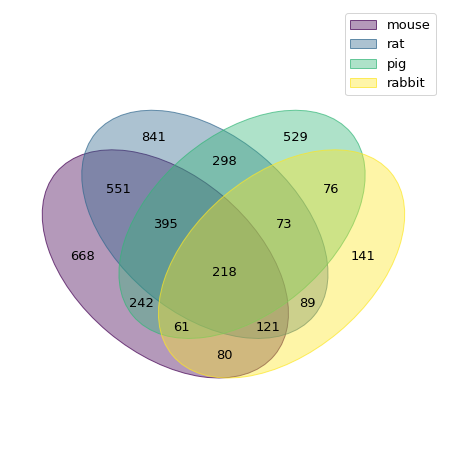

In [25]:
mouse_gene_set = set(mouse_gene_IDs)
rat_gene_set = set(mouse_orthologues_for_rat)
pig_gene_set = set(mouse_orthologues_for_pig)
rabbit_gene_set = set(mouse_orthologues_for_rabbit)

all_responsive_genes = {
    "mouse": mouse_gene_set, "rat": rat_gene_set, "pig": pig_gene_set, "rabbit": rabbit_gene_set
}
venn(all_responsive_genes)

In [27]:
analysis_genes_df = pd.DataFrame(common_genes, columns= ["all_4_responsive"])

filename = "responsive_gene_subset.xlsx"
path = str(get_output_path("Responsive_genes")) + "\\" + filename

with pd.ExcelWriter(path) as writer:
    analysis_genes_df.to_excel(writer)
    
print("Output file created here:", path)

Output file created here: C:\Users\wolke\Documents\Code\Output\Responsive_genes\responsive_gene_subset.xlsx


In [28]:
genes_for_analysis_subset_df = Load_data.load_analysis_genes()


gene_list = list(genes_for_analysis_subset_df.gene)
all_responsive = []

for gene in gene_list:
    if gene in common_genes:
        all_responsive.append("TRUE")
    else:
        all_responsive.append("FALSE")
        

genes_for_analysis_subset_df ["responsive_in_all"] = all_responsive

filename = "responsive_analysis_genes.xlsx"
path = str(get_output_path("Responsive_genes")) + "\\" + filename

with pd.ExcelWriter(path) as writer:
    genes_for_analysis_subset_df.to_excel(writer)
    
print("Output file created here:", path)

Output file created here: C:\Users\wolke\Documents\Code\Output\Responsive_genes\responsive_analysis_genes.xlsx
